In [ ]:
# Problem Statement
# Gandhi Cloth Company is capable of manufacturing three types of clothing: shirts, shorts,
# and pants. The manufacture of each type of clothing requires that Gandhi have the ap-
# propriate type of machinery available. The machinery needed to manufacture each type
# of clothing must be rented at the following rates: shirt machinery, $200 per week; shorts
# machinery, $150 per week; pants machinery, $100 per week. The manufacture of each
# type of clothing also requires the amounts of cloth and labor shown in Table 2. Each week,
# 150 hours of labor and 160 sq yd of cloth are available. The variable unit cost and sell-
# ing price for each type of clothing are shown in Table 3. 

# Formulate an IP whose solution will maximize Gandhi’s weekly profits.

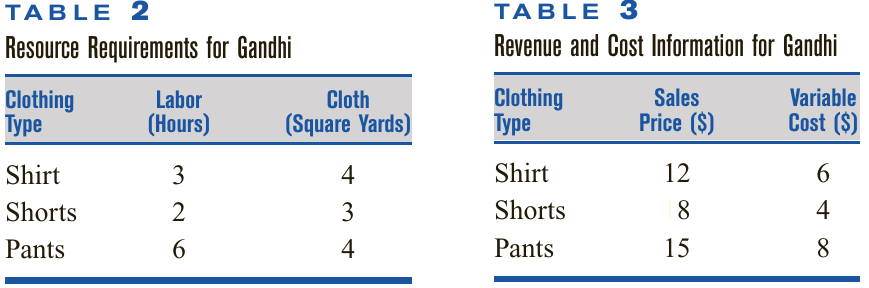

In [26]:
# get the image 
Image("Gandhi-Cloth.png", width=500, height=200) 

In [25]:
# First, import packages
import pandas as pd
from IPython.display import Image 
import gurobipy as gp
from gurobipy import GRB

# Define a gurobipy model for the decision problem
m = gp.Model('fixed-charge')

## Decision Variables
This is what the optimization solver determines, which are the actions you have control over. As a reminder, they come in three main flavors:
- `Continuous`: Price of a product
- `Integer`: The number of food trucks to use for an event
- `Binary`: Yes/no decision to include a certain stock in a portfolio


### Add Variables in gurobipy
`gurobipy` let's you add decision variables primarily with two (similar) commands:
- [addVar()](https://www.gurobi.com/documentation/10.0/refman/py_model_addvar.html) adds a single variable
- [addVars()](https://www.gurobi.com/documentation/10.0/refman/py_model_addvar.html) adds a group of variables by sets/indices

When using `addVars` you have to provide the indices of the variables you want to add, which for us are the production and distribution locations. There are other arguments we can use and will cover a couple of them later on.  

### Our Decision Variables
As is often the case in writing code, there are several ways to get to the same point. Below we can see three different ways to create the decision variables.


In [2]:
# Create integer variables
# x1 = number of shirts produced each week 
x1 = m.addVar(vtype=GRB.INTEGER, name="x1")

# x2 = number of shorts produced each week 
x2 = m.addVar(vtype=GRB.INTEGER, name="x2")

# x3 = number of pants produced each week 
x3= m.addVar(vtype=GRB.INTEGER, name="x3")

In [3]:
# Create binary variables
# y1 = 1, if any shirts are manufactured, 0 otherwise 
y1 = m.addVar(vtype=GRB.BINARY, name="y1")

# y2 = 1, if any shorts are manufactured, 0 otherwise 
y2 = m.addVar(vtype=GRB.BINARY, name="y2")

# y3 = 1, if any pants are manufactured, 0 otherwise 
y3 = m.addVar(vtype=GRB.BINARY, name="y3")

In [4]:
# Set objective
m.setObjective(6 * x1 +  4 * x2 + 7 * x3 - 200 * y1 - 150 * y2 - 100 * y3, GRB.MAXIMIZE)

In [5]:
# Constraints
# Constraint 1: At most, 150 hours of labor can be used each week.
labor = m.addConstr(3 * x1 + 2 * x2 + 6 * x3 <= 150, "c1")    # labor constraint

In [6]:
# Constraint 2: At most, 160 sq yd of cloth can be used each week.
cloth = m.addConstr(4 * x1 + 3 * x2 + 4 * x3 <= 160, "c2")    # cloth constraint

In [7]:
# Update the model
m.update()

In [8]:
# Optimize model
m.optimize()

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Linux Mint 21.3")

CPU model: AMD Ryzen 5 5600G with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 2 rows, 6 columns and 6 nonzeros
Model fingerprint: 0xb1fffcab
Variable types: 0 continuous, 6 integer (3 binary)
Coefficient statistics:
  Matrix range     [2e+00, 6e+00]
  Objective range  [4e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+02, 2e+02]
Found heuristic solution: objective 240.0000000
Presolve removed 0 rows and 3 columns
Presolve time: 0.00s
Presolved: 2 rows, 3 columns, 6 nonzeros
Variable types: 0 continuous, 3 integer (0 binary)
Found heuristic solution: objective 241.0000000

Root relaxation: objective 2.500000e+02, 3 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestB

In [9]:
# Print results
for v in m.getVars():
    print(f"{v.VarName} {v.X:g}")

print(f"Obj: {m.ObjVal:g}")

x1 30
x2 -0
x3 10
y1 0
y2 0
y3 0
Obj: 250


![](bigM-constraint.png)

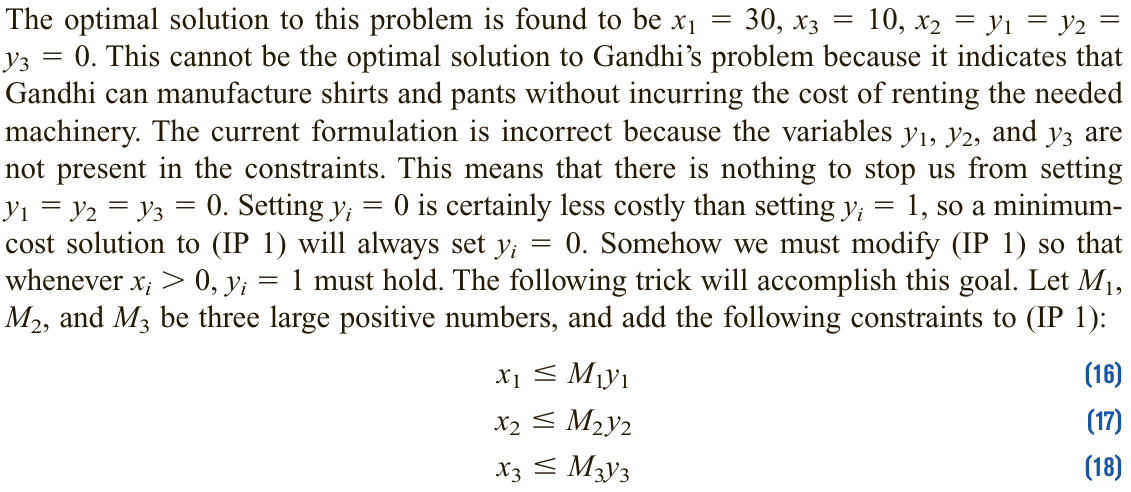

In [23]:
# import image module 
from IPython.display import Image 
  
# get the image 
Image("bigM-constraint.png", width=500, height=200) 

In [ ]:
# Define Big M
M = 5000

In [11]:
# Constraint 3: Adding Big M constraints
c3 = m.addConstr(x1 <= M * y1, "c3")    # x1 <= M * y1
c4 = m.addConstr(x2 <= M * y2, "c4")    # x2 <= M * y2
c5 = m.addConstr(x3 <= M * y3, "c5")    # x3 <= M * y3

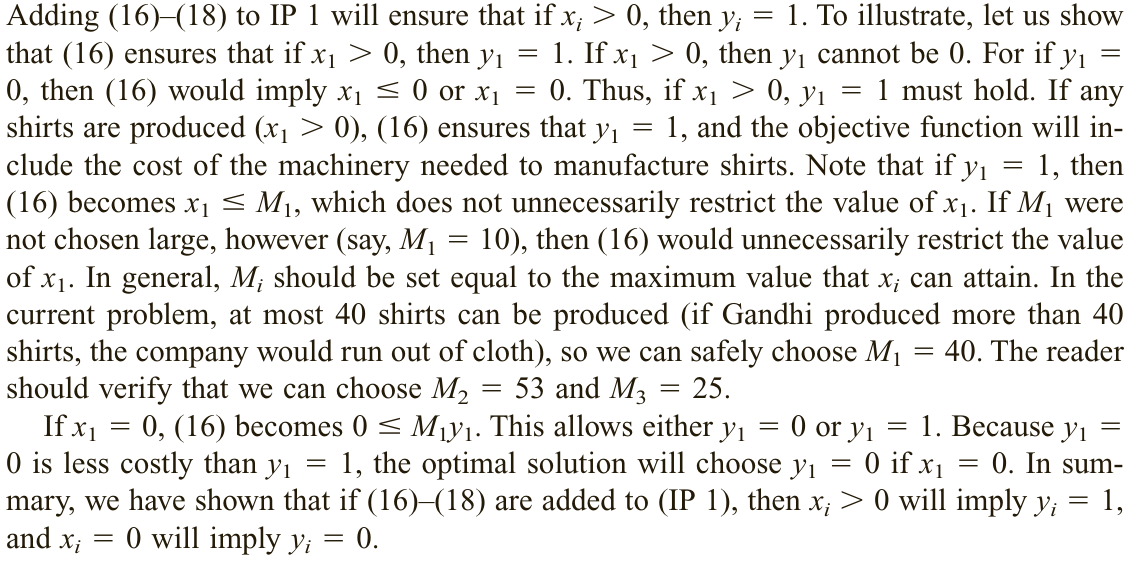

In [24]:
Image("bigM-explain.png", width=500, height=200) 

In [12]:
# Update the model
m.update()

In [15]:
m.write('bigM.lp')

In [13]:
# Optimize model
m.optimize()

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Linux Mint 21.3")

CPU model: AMD Ryzen 5 5600G with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 5 rows, 6 columns and 12 nonzeros
Model fingerprint: 0xda61d941
Variable types: 0 continuous, 6 integer (3 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  Objective range  [4e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+02, 2e+02]

MIP start from previous solve did not produce a new incumbent solution
MIP start from previous solve violates constraint c3 by 30.000000000

Found heuristic solution: objective -0.0000000
Found heuristic solution: objective 40.0000000
Presolve time: 0.00s
Presolved: 5 rows, 6 columns, 12 nonzeros
Variable types: 0 continuous, 6 integer (3 binary)

Root relaxation: objective 8.111321e+01, 4 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Curre

In [14]:
# Print results
for v in m.getVars():
    print(f"{v.VarName} {v.X:g}")

print(f"Obj: {m.ObjVal:g}")

x1 -0
x2 -0
x3 25
y1 -0
y2 -0
y3 1
Obj: 75


### ----------------------------